In [378]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
# import csv
""" 파일 따로 저장하는 방법 Ex
fout = open('C:\Git\KDT\BigData\EX_PY07\daegu-utf8.csv', 'w', newline='', encoding='utf-8-sig')
wr = csv.writer(fout)
fout.close()
"""
file_name = 'GlobalLandTemperatures.csv'
phili = '필리핀태풍.xlsx'
time = 'datttime.xlsx'
Climate = pd.read_csv(file_name, encoding = 'utf-8')
Philippines = pd.read_excel(phili)
time = pd.read_excel(time)
Climate['dt'] = pd.to_datetime(Climate['dt'])
Climate.drop(['AverageTemperatureUncertainty'], axis=1, inplace=True)
Climate = Climate[(Climate['dt'].dt.year >= 1980) & (Climate['dt'].dt.year <= 2010)]
Climate

,dt,AverageTemperature,Country
2834,1980-01-01,-4.073,횇land
2835,1980-02-01,-6.484,횇land
2836,1980-03-01,-3.947,횇land
2837,1980-04-01,2.928,횇land
2838,1980-05-01,6.154,횇land
...,...,...,...
577424,2010-08-01,18.260,Zimbabwe
577425,2010-09-01,23.109,Zimbabwe
577426,2010-10-01,25.943,Zimbabwe
577427,2010-11-01,25.211,Zimbabwe


In [379]:
Climate = Climate[Climate['Country']=='Philippines']

In [380]:
Philippines_temp = Climate
Philippines_temp.drop(['Country'],axis=1, inplace=True)
Philippines_temp

C:\Users\kjy19\AppData\Local\Temp\ipykernel_14580\1787132791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Philippines_temp.drop(['Country'],axis=1, inplace=True)


,dt,AverageTemperature
413216,1980-01-01,25.412
413217,1980-02-01,25.531
413218,1980-03-01,26.773
413219,1980-04-01,27.433
413220,1980-05-01,28.140
...,...,...
413583,2010-08-01,27.489
413584,2010-09-01,27.603
413585,2010-10-01,27.124
413586,2010-11-01,26.840


In [381]:
time

,1981-01-01
0,1981-02-01
1,1981-03-01
2,1981-04-01
3,1981-05-01
4,1981-06-01
...,...
342,2009-08-01
343,2009-09-01
344,2009-10-01
345,2009-11-01


In [382]:
# time[1981-01-01 00:00:00]

In [383]:
Philippines['Date'] = Philippines['year'].astype('string') + '-' + Philippines['month'].astype('string')

In [384]:
Philippines.drop(['year','month','day'], axis=1, inplace=True)

In [385]:
Philippines['Date'] = pd.to_datetime(Philippines['Date'])
# Climate['dt'] = pd.to_datetime(Climate['dt'])

In [386]:
Philippines

,Unnamed: 0,ID,hour,grade,Latitude,Longitude,Central pressure,Date
0,28096,8002,0,Severe Tropical Storm,136,1267,985,1980-05-01
1,28097,8002,6,Severe Tropical Storm,143,1258,980,1980-05-01
2,28098,8002,12,Severe Tropical Storm,148,1250,975,1980-05-01
3,28099,8002,18,Severe Tropical Storm,155,1244,970,1980-05-01
4,28100,8002,0,Typhoon,160,1240,965,1980-05-01
...,...,...,...,...,...,...,...,...
4104,57490,1013,0,Typhoon,195,1175,940,2010-10-01
4105,57491,1013,6,Typhoon,199,1176,935,2010-10-01
4106,57492,1013,12,Typhoon,202,1179,935,2010-10-01
4107,57493,1013,18,Typhoon,205,1180,945,2010-10-01


In [387]:
PhilippinesDF = pd.DataFrame(columns=['dt','Created_Cyclone'])
pil_li = Philippines['Date'].unique()
idx = 0
for i in pil_li:
    PhilippinesDF.loc[idx] = [i,len(Philippines[Philippines['Date']==i]['ID'].unique())]
    idx += 1


In [388]:
Philippines_temp

,dt,AverageTemperature
413216,1980-01-01,25.412
413217,1980-02-01,25.531
413218,1980-03-01,26.773
413219,1980-04-01,27.433
413220,1980-05-01,28.140
...,...,...
413583,2010-08-01,27.489
413584,2010-09-01,27.603
413585,2010-10-01,27.124
413586,2010-11-01,26.840


In [389]:
Philippines_temp['dt'], len(Philippines_temp['dt'].unique())

(413216   1980-01-01
 413217   1980-02-01
 413218   1980-03-01
 413219   1980-04-01
 413220   1980-05-01
             ...    
 413583   2010-08-01
 413584   2010-09-01
 413585   2010-10-01
 413586   2010-11-01
 413587   2010-12-01
 Name: dt, Length: 372, dtype: datetime64[ns],
 372)

In [390]:
PhilippinesDF.set_index('dt',inplace=True)
Philippines_temp.set_index('dt',inplace=True)


In [391]:
# Philippines_temp

In [392]:
merged_df = pd.concat([Philippines_temp, PhilippinesDF], axis=1, join='inner', keys=['temp', 'cyclone'])    # outer

In [393]:
merged_df

,temp,cyclone
,AverageTemperature,Created_Cyclone
dt,,
1980-05-01,28.140,3
1980-06-01,27.491,1
1980-07-01,27.254,3
1980-09-01,26.961,2
1980-10-01,26.703,1
...,...,...
2009-11-01,26.829,1
2010-07-01,27.658,2


In [394]:
merged_df = merged_df.droplevel(level=0, axis=1)
merged_df

,AverageTemperature,Created_Cyclone
dt,,
1980-05-01,28.140,3
1980-06-01,27.491,1
1980-07-01,27.254,3
1980-09-01,26.961,2
1980-10-01,26.703,1
...,...,...
2009-11-01,26.829,1
2010-07-01,27.658,2
2010-08-01,27.489,3


In [395]:


# sss = merged_df.unstack().reset_index()
# sss = sss[['dt',0]]
# sss.columns = []

In [399]:
merged_df.corr()['Created_Cyclone'][0]
# merged_df[['temp','temp']]

# sss = merged_df[['temp','cyclone']]
# sss

C:\Users\kjy19\AppData\Local\Temp\ipykernel_14580\2790002224.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  merged_df.corr()['Created_Cyclone'][0]


np.float64(-0.09476326498481528)

In [397]:
merged_df.corr()

,AverageTemperature,Created_Cyclone
AverageTemperature,1.000000,-0.094763
Created_Cyclone,-0.094763,1.000000


In [400]:
# r = float(round(merged_df.corr()['temp']['AverageTemperature'].values[1],3))
# r = float(r)

In [ ]:
# plt.legend(round(a.corr()['HU 빈도'],2))

In [401]:
plt.scatter(merged_df['temp','AverageTemperature'].values, merged_df['cyclone','Created_Cyclone'].values)
plt.legend(round(merged_df.corr()['Created_Cyclone'][0]))
plt.show()


KeyError: ('temp', 'AverageTemperature')

In [406]:
merged_df.corr().iloc[0][1]

C:\Users\kjy19\AppData\Local\Temp\ipykernel_14580\3621999827.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  merged_df.corr().iloc[0][1]


np.float64(-0.09476326498481528)

In [409]:
merged_df

,AverageTemperature,Created_Cyclone
dt,,
1980-05-01,28.140,3
1980-06-01,27.491,1
1980-07-01,27.254,3
1980-09-01,26.961,2
1980-10-01,26.703,1
...,...,...
2009-11-01,26.829,1
2010-07-01,27.658,2
2010-08-01,27.489,3


C:\Users\kjy19\AppData\Local\Temp\ipykernel_14580\836557451.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend(float(round(merged_df.corr().iloc[0][1],2)))


TypeError: 'float' object is not iterable

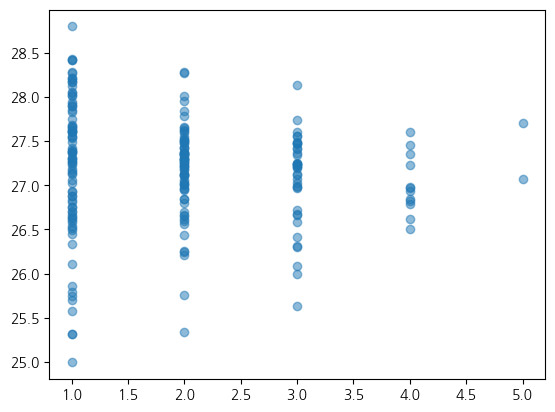

In [413]:
plt.scatter( merged_df['Created_Cyclone'].values,merged_df['AverageTemperature'].values, alpha = 0.5)
plt.legend(float(round(merged_df.corr().iloc[0][1],2)))
plt.title('필리핀 월별 평균 기온 - 태풍 발생')
# plt.